# SUPPORT VECTOR MACHINE

## CALIFORNIA HOUSING DATASET

## HOUSING PRICE PREDICTION

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.DataFrame(pd.read_csv("housing.csv"))

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\Susheel Yadav\AppData\Local\Temp\ipykernel_11988\1756734483.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot = True, cmap="YlGnBu")


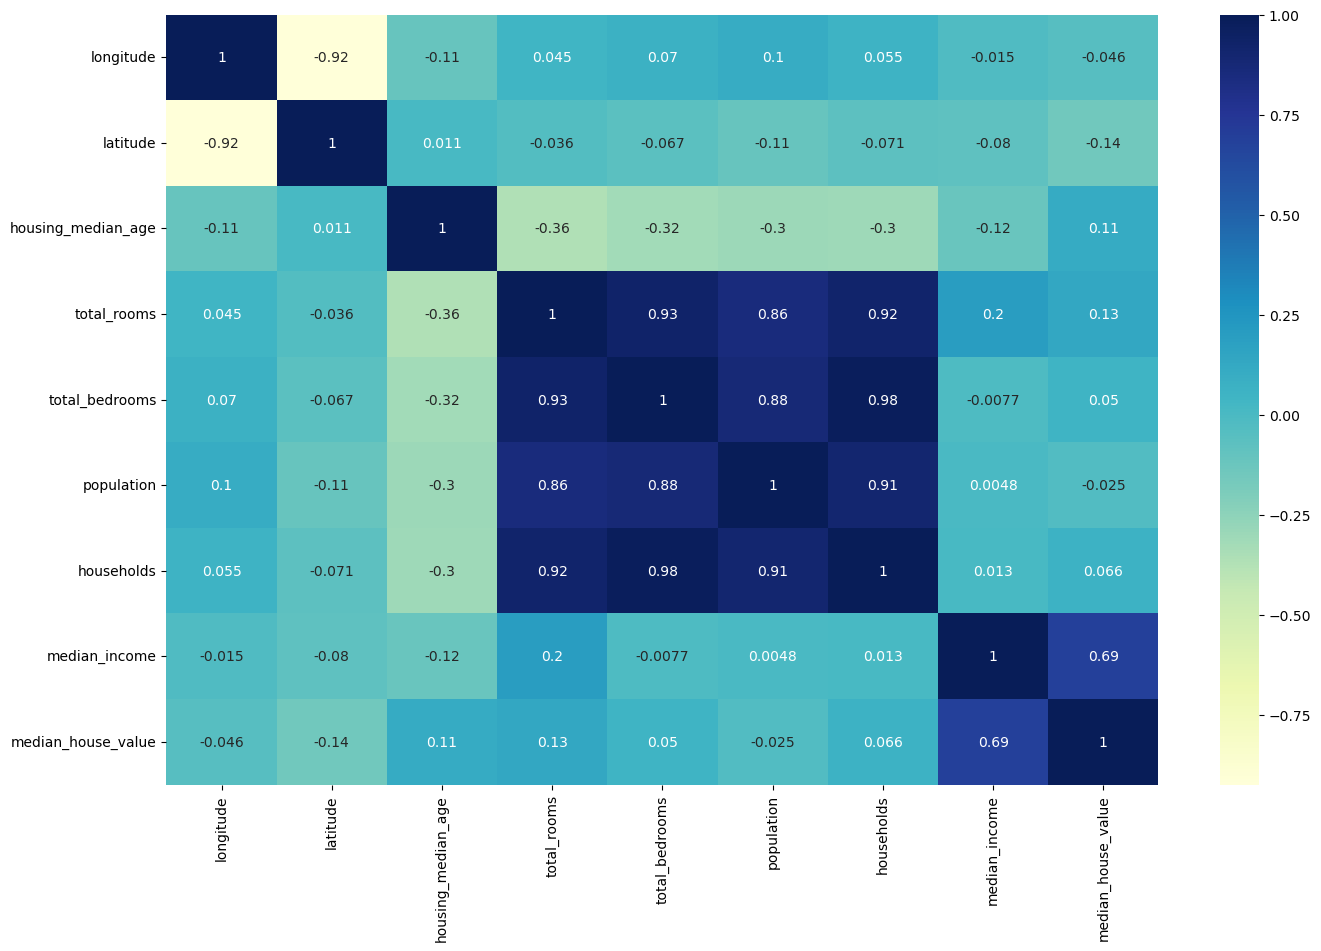

In [6]:
# to check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sb.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [7]:
df.shape

(20640, 10)

<function matplotlib.pyplot.show(close=None, block=None)>

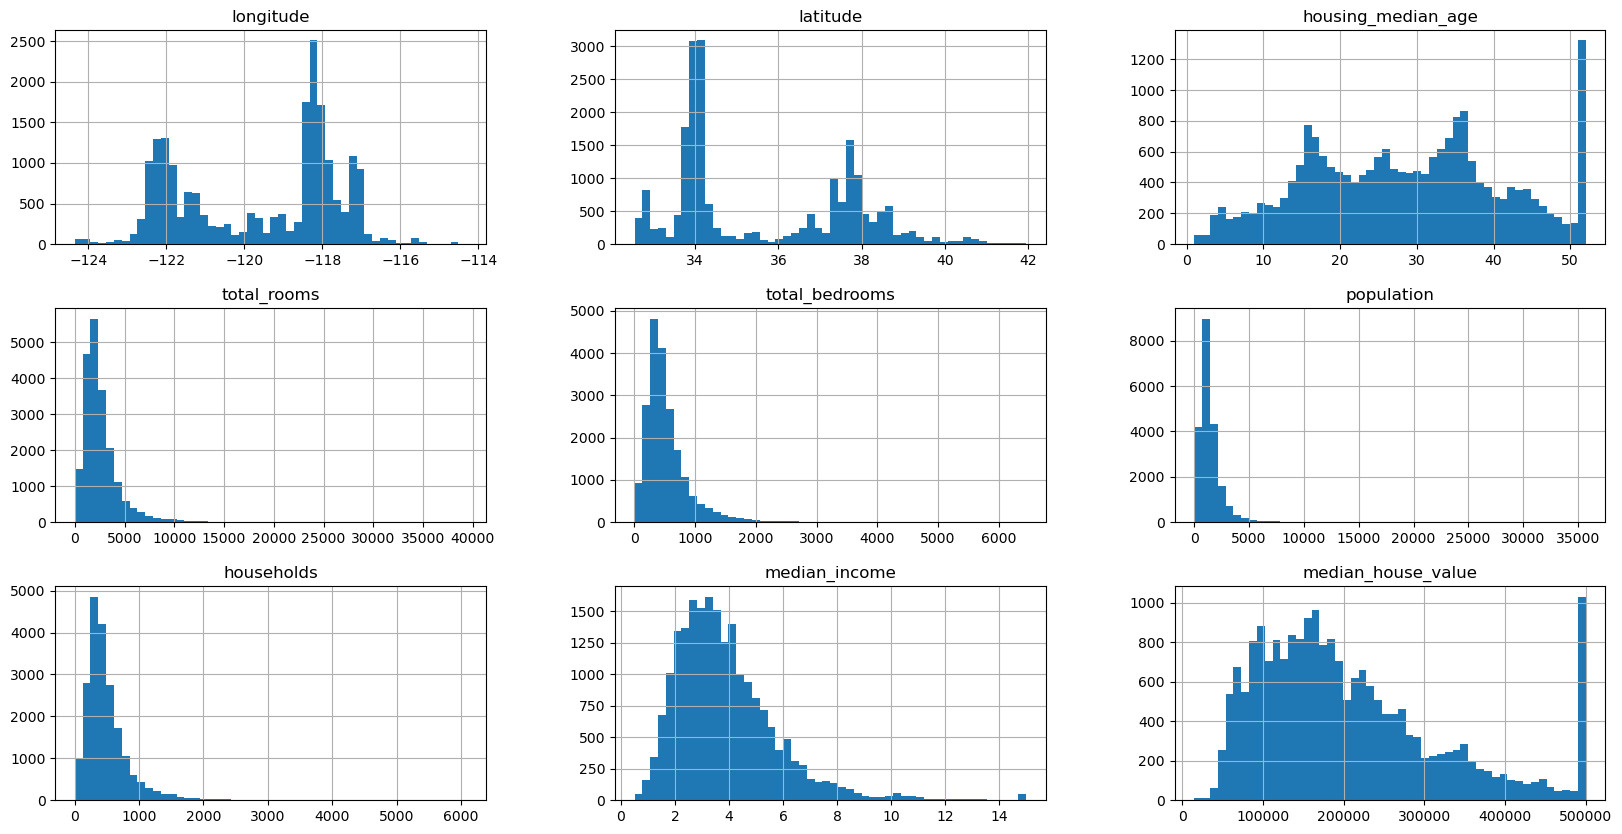

In [8]:
df.hist(figsize = (20, 10), bins = 50)
plt.show

In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df['total_bedrooms'].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [11]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mode().iloc[0], inplace  = True)

In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

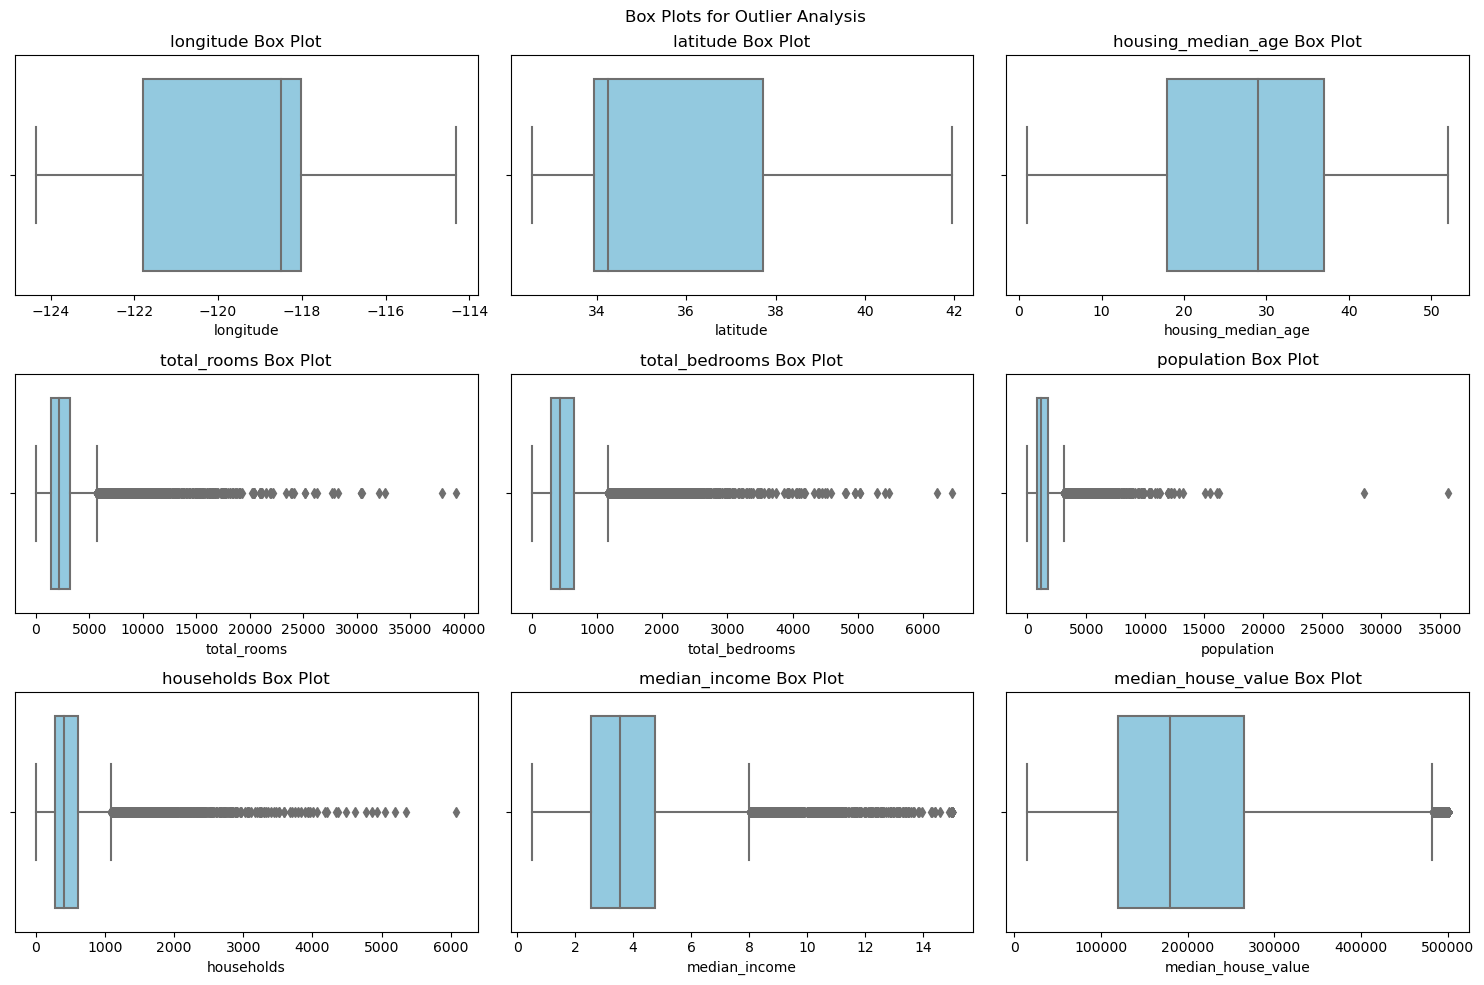

In [13]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Box Plots for Outlier Analysis')

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sb.boxplot(data=df, x=feature, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'{feature} Box Plot')

plt.tight_layout()
plt.show()


In [14]:
features = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

# Remove or cap outliers in each feature
for feature in features:
    df = remove_outliers_iqr(df, feature)

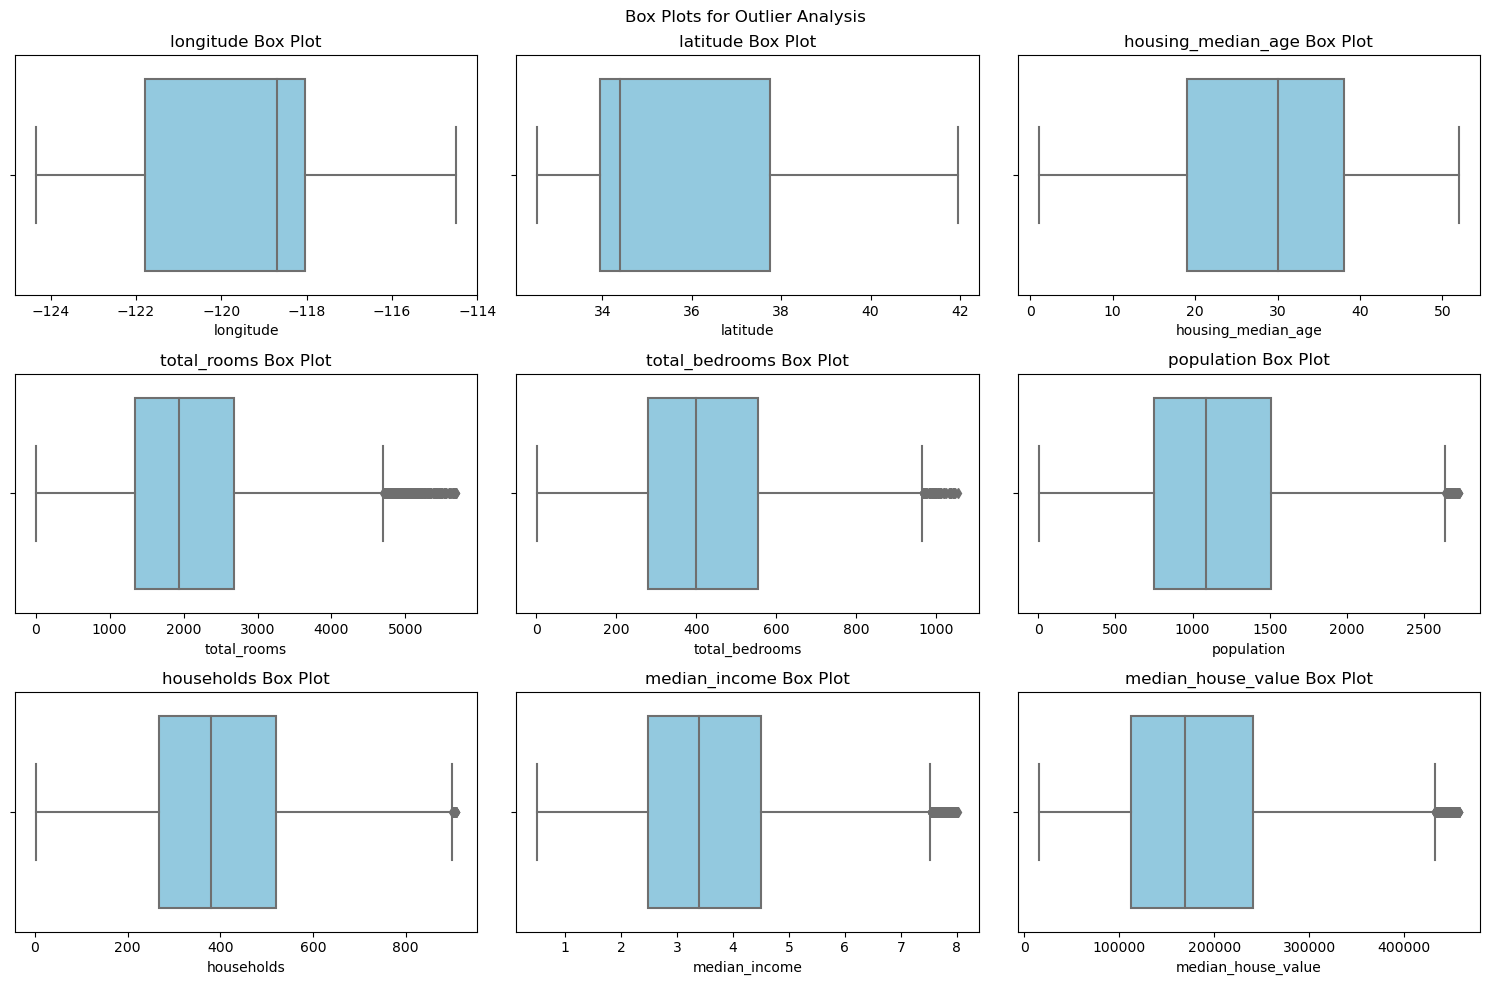

In [15]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.suptitle('Box Plots for Outlier Analysis')

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sb.boxplot(data=df, x=feature, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'{feature} Box Plot')

plt.tight_layout()
plt.show()

In [16]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoder.fit_transform(df[['ocean_proximity']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [18]:
encoded = pd.DataFrame(encoder.fit_transform(df[['ocean_proximity']]).toarray(),columns = encoder.get_feature_names_out())

In [19]:
encoded

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
16897,0.0,1.0,0.0,0.0,0.0
16898,0.0,1.0,0.0,0.0,0.0
16899,0.0,1.0,0.0,0.0,0.0
16900,0.0,1.0,0.0,0.0,0.0


In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [21]:
df = pd.merge(df,encoded,left_index=True,right_index=True)

In [22]:
df.drop(['ocean_proximity'],axis=1,inplace=True)

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.0,0.0,0.0,1.0,0.0


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [25]:
X = df.drop('median_house_value', axis = 1)
y = df['median_house_value']

In [26]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,0.0,0.0,0.0,1.0,0.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,0.0,0.0,0.0,1.0,0.0


In [28]:
y.head()

2    352100.0
3    341300.0
4    342200.0
5    269700.0
6    299200.0
Name: median_house_value, dtype: float64

In [29]:
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
]

In [30]:
svr = SVR()

In [31]:
## grid seach cv
### Due to large dataset we have used only first 5000 instances 

grid_search = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_scaled[:5000], y.iloc[:5000])

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.001, 0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error')

In [32]:
best_svr = grid_search.best_estimator_

In [33]:
scores = cross_val_score(best_svr, X_scaled[:5000], y.iloc[:5000], cv=3, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [34]:
mean_rmse = rmse_scores.mean()
std_rmse = rmse_scores.std()

print("Best SVR model:", best_svr)
print(f"Cross-Validation RMSE: Mean = {mean_rmse:.2f}, Std = {std_rmse:.2f}")

Best SVR model: SVR(C=1000, kernel='linear')
Cross-Validation RMSE: Mean = 87458.86, Std = 19662.22


In [35]:
## randomized search cv

param_dist = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}

In [36]:
random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
random_search.fit(X_scaled[:5000], y.iloc[:5000])

RandomizedSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [0.001, 0.01, 0.1, 1, 10],
                                        'kernel': ['linear', 'rbf']},
                   scoring='neg_mean_squared_error')

In [37]:
best_svr2 = random_search.best_estimator_

In [38]:
scores2 = cross_val_score(best_svr, X_scaled[:5000], y.iloc[:5000], cv=3, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-scores2)

In [39]:
mean_rmse2 = rmse_scores2.mean()
std_rmse2 = rmse_scores2.std()

print("Best SVR model:", best_svr2)
print(f"Cross-Validation RMSE: Mean = {mean_rmse2:.2f}, Std = {std_rmse2:.2f}")

Best SVR model: SVR(C=1000, gamma=0.001, kernel='linear')
Cross-Validation RMSE: Mean = 87458.86, Std = 19662.22


Mean and standard deviation of our cross-validation scores are the same for both GridSearchCV and RandomizedSearchCV, it may indicate that both methods are exploring similar hyperparameter combinations within the specified search space.

Here are a few possible reasons for this similarity:

1. **Hyperparameter Space**: The grid we defined for GridSearchCV and the parameter distributions for RandomizedSearchCV might have some overlap, causing both methods to explore similar regions of the hyperparameter space.

2. **Number of Iterations**: If we set a relatively small number of iterations for RandomizedSearchCV, it's possible that the random search didn't explore a wide range of hyperparameter combinations.

3. **Dataset Size**: The performance of machine learning models, especially complex ones like SVM, can be highly dependent on the dataset size and characteristics. If the dataset is small or the target variable doesn't exhibit a wide range of variation, it can lead to similar results across different hyperparameter configurations.

To investigate further and potentially see more diversity in results, we can consider the following:

- **Increase the Search Space**: Expand the range of hyperparameters or their distributions to explore a broader space.

- **Increase the Number of Iterations**: In RandomizedSearchCV, we can increase the `n_iter` parameter to sample more hyperparameter combinations.

- **Analyze the Data**: Consider checking if our dataset exhibits high variability in the target variable. If the target variable is relatively stable, it can limit the performance differences across different hyperparameters.

- **Use Different Scoring Metrics**: Sometimes, changing the scoring metric can reveal differences in model performance.

- **Manually Experiment**: We can manually experiment with a few sets of hyperparameters to see if we can achieve improved results.

In [40]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
selector = SelectKBest(score_func = f_regression, k = 13)
X_selected = selector.fit_transform(X_scaled, y)

In [42]:
y_pred = best_svr.predict(X_selected)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

In [43]:
print("Best SVR model:", best_svr)
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Best SVR model: SVR(C=1000, kernel='linear')
RMSE: 71477.77
R-squared: 0.36


In [44]:
y_pred2 = best_svr2.predict(X_selected)
rmse2 = np.sqrt(mean_squared_error(y, y_pred2))
r2_2 = r2_score(y, y_pred2)

In [45]:
print("Best SVR model:", best_svr2)
print(f"RMSE: {rmse2:.2f}")
print(f"R-squared: {r2_2:.2f}")

Best SVR model: SVR(C=1000, gamma=0.001, kernel='linear')
RMSE: 71477.77
R-squared: 0.36


1. "Best SVR model: SVR(C=1000, gamma=1, kernel='linear')": This line shows the hyperparameters of the best SVR model that was selected through your grid search or randomized search. In this case, the best model uses a linear kernel with a C parameter of 1000 and a gamma of 1. This is the configuration that the model performed best with.

2. "Cross-Validation RMSE: Mean = 87458.86, Std = 19662.22": These values represent the results of cross-validation. The Root Mean Squared Error (RMSE) is a measure of the model's prediction accuracy. In this case, the mean RMSE across the cross-validation folds is approximately 87,458.86, and the standard deviation is about 19,662.22. This indicates how consistent the model's performance is across different folds.

3. "RMSE: 71477.77" and "R-squared: 0.36": These values are specific to the performance of the best SVR model on the training data. The RMSE of 71,477.77 is the prediction error for this model, and the R-squared (0.36) indicates that the model explains approximately 36% of the variance in the target variable. An R-squared of 0.36 suggests that the model captures some of the relationships in the data but may not be a very strong fit. The RMSE is an absolute measure of prediction error.

To evaluate this model further:

- An RMSE of 71,477.77 means that, on average, the model's predictions have an error of around 71,477.77 units. This value should be considered in the context of your specific problem. If it's acceptable depends on the scale and nature of the target variable.

- An R-squared value of 0.36 indicates that the model explains 36% of the variance in the target variable, leaving a substantial amount of unexplained variance. Depending on your application, this level of explanation might be sufficient or may require further improvement.